<a href="https://colab.research.google.com/github/al34n1x/DataScience/blob/master/99.Machine_Learning/15_hierarchical_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Clustering-jerárquico" data-toc-modified-id="Clustering-jerárquico-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Clustering jerárquico</a></span></li><li><span><a href="#Ejemplo:-Cluster-Analysis-and-Segmentation" data-toc-modified-id="Ejemplo:-Cluster-Analysis-and-Segmentation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Ejemplo: Cluster Analysis and Segmentation</a></span><ul class="toc-item"><li><span><a href="#a)-Carga-de-los-datos" data-toc-modified-id="a)-Carga-de-los-datos-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>a) Carga de los datos</a></span></li><li><span><a href="#b)-Análisis-exploratorio-de-los-datos" data-toc-modified-id="b)-Análisis-exploratorio-de-los-datos-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>b) Análisis exploratorio de los datos</a></span></li><li><span><a href="#c)-Normalizacion-de-los-datos" data-toc-modified-id="c)-Normalizacion-de-los-datos-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>c) Normalizacion de los datos</a></span></li><li><span><a href="#d)-Selección-de-atributos" data-toc-modified-id="d)-Selección-de-atributos-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>d) Selección de atributos</a></span></li><li><span><a href="#e)-Medida-de-distancia" data-toc-modified-id="e)-Medida-de-distancia-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>e) Medida de distancia</a></span></li><li><span><a href="#f)-Método-de-clustering.-Clustering-Jerárquico" data-toc-modified-id="f)-Método-de-clustering.-Clustering-Jerárquico-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>f) Método de clustering. Clustering Jerárquico</a></span></li><li><span><a href="#g)-Método-de-clustering.-K-means" data-toc-modified-id="g)-Método-de-clustering.-K-means-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>g) Método de clustering. K-means</a></span><ul class="toc-item"><li><span><a href="#Validación-K-means" data-toc-modified-id="Validación-K-means-2.7.1"><span class="toc-item-num">2.7.1&nbsp;&nbsp;</span>Validación K-means</a></span></li></ul></li><li><span><a href="#h)-Perfil-de-los-segmentos" data-toc-modified-id="h)-Perfil-de-los-segmentos-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>h) Perfil de los segmentos</a></span><ul class="toc-item"><li><span><a href="#Comparacion-del-resultado-con-ambos-metodos-de-clustering" data-toc-modified-id="Comparacion-del-resultado-con-ambos-metodos-de-clustering-2.8.1"><span class="toc-item-num">2.8.1&nbsp;&nbsp;</span>Comparacion del resultado con ambos metodos de clustering</a></span></li></ul></li></ul></li></ul></div>



---

## Clustering jerárquico

Otra forma de agrupar datos es mediante el clustering jerárquico, que organiza los datos en un árbol  llamado dendrograma. Existen dos formas de analizar los datos para construir el árbol:

- Bottom-Up (de abajo a arriba): cada dato es un cluster, después se juntan los dos datos más parecidos, se va repitiendo este proceso hasta que sólo hay un clúster.

- Top-Down (de arriba a abajo): empezamos con un clúster que agrupa a todos los datos, después dividimos en dos por aquella división que más separe los clusters resultantes. Este proceso se repite hasta que cada dato es un clúster en sí mismo.

En el eje x del dendograma están los índices de cada dato, mientras que en el eje y están las distancias a las cuales los clusters fueron unidos para formar otro clúster. El algoritmo tiene que computar estas distancias y hay varias formas de hacerlo:

- Link simple: considerar la distancia entre dos clusters como la distancia entre sus miembros más cercanos. Puede crear efectos de cadena.
- Link completo: considerar la distancia entre dos clusters como la distancia entre sus miembros más lejanos. Puede crear efectos de cadena.
- Media: considerar la distancia entre dos clusters como la distancia media.

In [ ]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

np.set_printoptions(precision=5, suppress=True)

# We generated two clusters with 100 and 50 points respectively.

np.random.seed(4711)
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
features = np.concatenate((a, b),)

print (features.shape)

(150, 2)


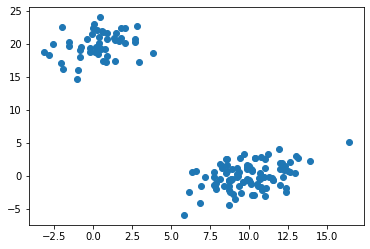

In [ ]:
plt.scatter(features[:,0], features[:,1])
plt.show()



Generamos la matriz de enlace

In [ ]:
Z= linkage(features, 'ward')

In [ ]:
Z

array([[ 52.     ,  53.     ,   0.04151,   2.     ],
       [ 14.     ,  79.     ,   0.05914,   2.     ],
       [ 33.     ,  68.     ,   0.07107,   2.     ],
       [ 17.     ,  73.     ,   0.07137,   2.     ],
       [  1.     ,   8.     ,   0.07543,   2.     ],
       [ 85.     ,  95.     ,   0.10928,   2.     ],
       [108.     , 131.     ,   0.11007,   2.     ],
       [  9.     ,  66.     ,   0.11302,   2.     ],
       [ 15.     ,  69.     ,   0.11429,   2.     ],
       [ 63.     ,  98.     ,   0.1212 ,   2.     ],
       [107.     , 115.     ,   0.12167,   2.     ],
       [ 65.     ,  74.     ,   0.1249 ,   2.     ],
       [ 58.     ,  61.     ,   0.14028,   2.     ],
       [ 62.     , 152.     ,   0.1726 ,   3.     ],
       [ 41.     , 158.     ,   0.1779 ,   3.     ],
       [ 10.     ,  83.     ,   0.18635,   2.     ],
       [114.     , 139.     ,   0.20419,   2.     ],
       [ 39.     ,  88.     ,   0.20628,   2.     ],
       [ 70.     ,  96.     ,   0.21931,   2. 



Vamos a ver el Dendograma en modo vectorial para no perder detalle

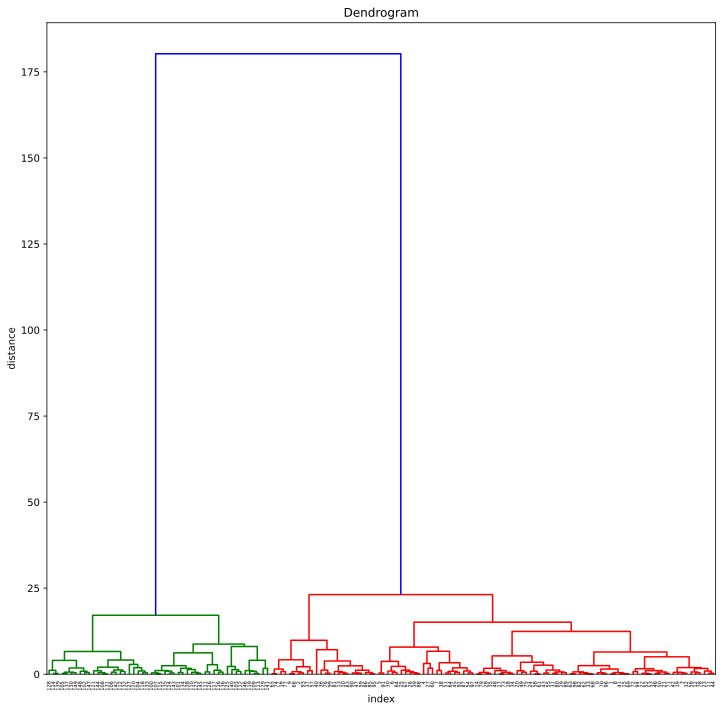

In [ ]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')


# We calculate the complete dendrogram
plt.figure(figsize=(12, 12))
plt.title(u'Dendrogram')
plt.xlabel(u'index')
plt.ylabel(u'distance')
dendrogram(Z)
plt.show()



## Ejemplo: Cluster Analysis and Segmentation



En este ejemplo discutimos el proceso de clustering y segmentación usando un dataset sencillo, que describe las actitudes de las personas al comprar en centros comerciales. 

Supongamos que la gerencia de un gran centro comercial desea conocer que tipos de clientes que visitan o pueden visitar el centro comercial. Según su experiencia existen diferentes segmentos de mercado y les gustaría diseñar y posicionar mejor los servicios del centro comercial con el objetivo de atraer a los segmentos más rentables, o diferenciar la oferta de sus servicios (i.e., invitaciones a eventos, descuentos, etc.) dependiendo del segmento de mercado. 

Para tomar estas decisiones la genrencia ejecuta un estudio de mercado en forma de encuesta a los clientes potenciales. En este caso es una se realiza la encuesta a una pequeña muestra, donde cada persona responde seis preguntas sobre cuestiones actitudinales, una pregunta sobre cuan a menudo visita el centro comercial, todas en una escala del 1-7, y una pregunta sobre los ingresos de la unidad familiar. Las preguntas son:

|Indicador| Descripción|
|---------|------------|
|V1| El *shopping* es divertido (1-7)|
|V2| El *shopping* es negativo para tu presupuesto (1-7)|
|V3| Combino *shopping* con salir a comer fuera (1-7)|
|V4| Intento aprovechar las ofertas (1-7)|
|V5| No me interesa el *shopping* (1-7)|
|V6| Se puede ahorrar mucho comparando precios (1-7)|
|Income| ingresos familiares (en dolares)|
|Mall.Visits| Frecuencia de visitas al centro comercial (1-7)|

Para realizar el estudio vamos  seguir los siguientes pasos:

1. Verificar la métrica de los datos.

2. Decidir si es necesario reescalar los datos.

3. Determinar cuales variables/atributos/features usar para el clustering.

4. Definir una medida de similitud/disimilitud entre observaciones.

5. Visualizar individualmente los atributos y las distancia entre pares de observaciones.

6. Seleccionar el método de clustering y decidir el número de clusters.

7. Perfilar e interpretar los clusters.

8. Evaluar la robustez de los clusters obtenidos.



### a) Carga de los datos

El dataset consiste en una tabla con cuarenta filas, una por cada cliente encuestado, y nueve columnas correspondientes a un identificador y a las ochos preguntas del estudio de mercado. Vamos a cargar el dataset desde el fichero `cust_data.csv`.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



Carga de datos

In [ ]:
#raw_data = spark.read.csv(DATA_PATH+'cust_data.csv', sep=';', 
#                          header=True, inferSchema=True).toPandas().set_index('Variables')

# Local read
# raw_data = pd.read_csv('../../data/cust_data.csv', sep=';', index_col='Variables')
#raw_data.head()

In [ ]:
raw_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/UADE/Diplomatura Ciencia de Datos/Material de Clases/Material Python/99_Datasets/cust_data.csv', sep=';', index_col='Variables')
raw_data.head()

,ID,V1,V2,V3,V4,V5,V6,Income,Mall.Visits
Variables,,,,,,,,,
1,1,6,4,7,3,2,3,60.0,3
2,2,2,3,1,4,5,4,30.0,1
3,3,7,2,6,4,1,3,70.0,3
4,4,4,6,4,5,3,6,30.0,7
5,5,1,3,2,2,6,4,60.0,1




Antes de continuar el análisis vamos a corregir la escala de la variable `Income`.

In [ ]:
raw_data[u'Income'] = raw_data[u'Income'].apply(lambda x: x * 1000)
raw_data.head()

,ID,V1,V2,V3,V4,V5,V6,Income,Mall.Visits
Variables,,,,,,,,,
1,1,6,4,7,3,2,3,60000.0,3
2,2,2,3,1,4,5,4,30000.0,1
3,3,7,2,6,4,1,3,70000.0,3
4,4,4,6,4,5,3,6,30000.0,7
5,5,1,3,2,2,6,4,60000.0,1




Los métodos estadísticos de clustering requieren que los datos posean una métrica definida, es decir que sus valores sean cuantitativos, y por lo tanto valores numéricos definidos en un espacio métrico. Es decir, estos métodos utilizan una noción de distancia que les permite discriminar si dos observaciones son parecidas y diferentes entre si. Un ejemplo común de esta distancia es la distacia Euclídea.

Por lo tanto antes de continuar el análisis es necesario verificar que nuestros datos cumplen con los anteriores requisitos. Al inspeccionar los datos en nuestro dataset y el diseño del estudio de mercado podemos fácilmente confirmar que todos los campos son numéricos y poseen una métrica definida.



### b) Análisis exploratorio de los datos

Una etapa importante de un proyecto analítico es el análisi exploratorio de los datos. Esta etapa noos permite obtener concimientos valiosos sobre nuestros datos que nos permiten enriquecer las etapas posteriores del análisis. En general, esta etapa consiste en utilizar herramientas estadísticas descriptivas y gráficas para resumir y visualizar los datos.



Estadística descriptiva de los datos

In [ ]:
stats = pd.DataFrame({'Variables': raw_data.columns.values.tolist(),
                      'min': raw_data.apply(np.min, axis=0),
                      'X25.percent': raw_data.apply(np.percentile, args=(25,), axis=0),
                      'median': raw_data.apply(np.median, axis=0),
                      'mean': raw_data.apply(np.mean, axis=0),
                      'X75.percent': raw_data.apply(np.percentile, args=(75,), axis=0),
                      'max': raw_data.apply(np.max, axis=0),
                      'std': raw_data.apply(np.std, axis=0)})
stats

,Variables,min,X25.percent,median,mean,X75.percent,max,std
ID,ID,1.0,10.75,20.5,20.50,30.25,40.0,11.543396
V1,V1,1.0,2.00,4.0,3.85,5.25,7.0,1.851351
V2,V2,2.0,3.00,4.0,4.10,5.00,7.0,1.374773
V3,V3,1.0,2.00,4.0,3.95,6.00,7.0,1.961505
V4,V4,2.0,3.00,4.0,4.10,5.25,7.0,1.479865
V5,V5,1.0,2.00,3.5,3.45,4.25,7.0,1.716828
V6,V6,2.0,3.00,4.0,4.35,5.25,7.0,1.458595
Income,Income,25000.0,30000.00,42500.0,46000.00,60000.00,80000.0,17000.000000
Mall.Visits,Mall.Visits,0.0,2.00,3.0,3.25,4.25,7.0,1.920286


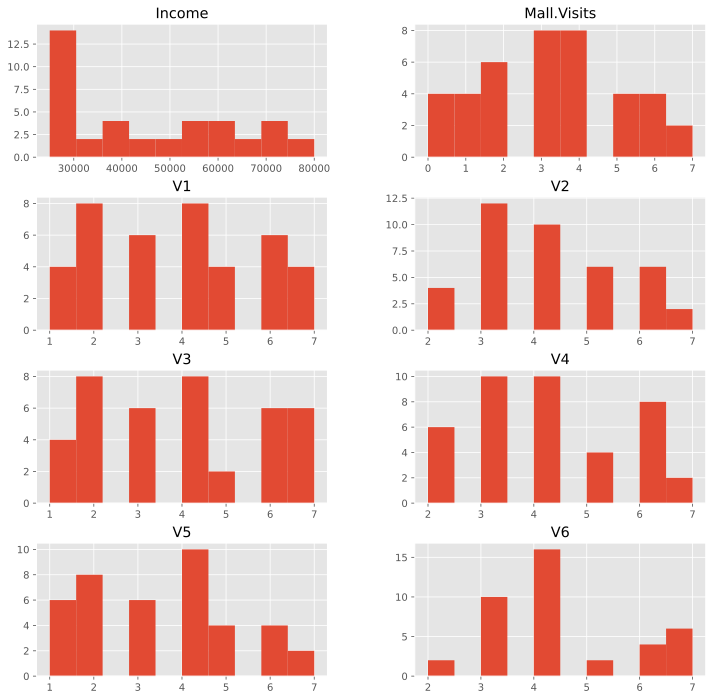

In [ ]:
plt.style.use('ggplot')
raw_data.loc[:,'V1':].hist(layout=(4,2), figsize = (12,12));



### c) Normalizacion de los datos

A partir del análisis exploratorio de los datos observamos que mientras las variables correspondientes a los aspectos actitudinales de la encuesta poseen valores dentro de la misma escala (1-7), hay una variable que es dos ordenes de magnitud mayor a las demás: `Income`.

Tener variables en diferentes escalas puede crear problemas, porque aquellas variables con valores altos tendrán mayor influencia en el resultado final del análisis que las otras. Por lo tanto, debemos considerar si es necesario reescalar todas las variables de tal forma que sus valores se encuentren en la misma escala. La normalización se puede hacer de distintas maneras:

1. Restando a cada registro la media y dividiendo por la desviación estándar se obtienen valores con media cero y varianza uno.
2. Restando a cada registro el mínimo y diviendo por el rango de valores se obtienen datos entre cero y uno.

Vamos a ver como estandarizaríamos todos los registros del dataset utilizando el primer tipo de normalización.

In [ ]:
def normalization(vector):
    if np.std(vector) != 0:
        vector = np.array((vector - np.mean(vector)) / np.std(vector))
    return vector

In [ ]:
data_norm = raw_data.apply(normalization, axis=0)
data_norm.head()

,ID,V1,V2,V3,V4,V5,V6,Income,Mall.Visits
Variables,,,,,,,,,
1,-1.689278,1.161314,-0.072739,1.554929,-0.743311,-0.844581,-0.925548,0.823529,-0.130189
2,-1.602648,-0.999270,-0.800132,-1.503948,-0.067574,0.902828,-0.239957,-0.941176,-1.171700
3,-1.516018,1.701460,-1.527525,1.045116,-0.067574,-1.427050,-0.925548,1.411765,-0.130189
4,-1.429389,0.081022,1.382047,0.025491,0.608164,-0.262111,1.131225,-0.941176,1.952834
5,-1.342759,-1.539416,-0.800132,-0.994135,-1.419048,1.485297,-0.239957,0.823529,-1.171700


In [ ]:
stats = pd.DataFrame({'Variables': data_norm.columns.values.tolist(),
                      'min': data_norm.apply(np.min, axis=0),
                      'X25.percent': data_norm.apply(np.percentile, args=(25,), axis=0),
                      'median': data_norm.apply(np.median, axis=0),
                      'mean': data_norm.apply(np.mean, axis=0),
                      'X75.percent': data_norm.apply(np.percentile, args=(75,), axis=0),
                      'max': data_norm.apply(np.max, axis=0),
                      'std': data_norm.apply(np.std, axis=0)})

stats

,Variables,min,X25.percent,median,mean,X75.percent,max,std
ID,ID,-1.689278,-0.844639,0.000000,4.440892e-17,0.844639,1.689278,1.0
V1,V1,-1.539416,-0.999270,0.081022,-3.053113e-17,0.756205,1.701460,1.0
V2,V2,-1.527525,-0.800132,-0.072739,2.664535e-16,0.654654,2.109440,1.0
V3,V3,-1.503948,-0.994135,0.025491,-9.159340e-17,1.045116,1.554929,1.0
V4,V4,-1.419048,-0.743311,-0.067574,1.828399e-16,0.777098,1.959638,1.0
V5,V5,-1.427050,-0.844581,0.029123,-1.110223e-16,0.465975,2.067766,1.0
V6,V6,-1.611139,-0.925548,-0.239957,2.664535e-16,0.617032,1.816817,1.0
Income,Income,-1.235294,-0.941176,-0.205882,0.000000e+00,0.823529,2.000000,1.0
Mall.Visits,Mall.Visits,-1.692456,-0.650945,-0.130189,-5.551115e-18,0.520756,1.952834,1.0




### d) Selección de atributos

La selección de variables es una etapa importante en cualquier análisis. En este caso particular, la decisión es crítica pues tiene un gran impacto sobre la segmentación obtenida. 

En general, la decisión se basa en parte el conocimiento de los atributos obtenido a partir del análisis exploratorio, y en otra parte en el conocimiento experto contextual del problema que queremos resolver.

Por ejemplo, en estudios y segmentación de mercado, es usual usar los atributos actitudinales para la segmentación y los atributos demográficos para perfilar los segmentos. Siguiendo esta misma idea, en nuestro caso usaremos las seis preguntas actitudinales para la segmentación y las dos restantes para el posterior perfilado.

In [ ]:
data_seg = pd.DataFrame(data_norm.iloc[:,1:7])
data_seg.head()

,V1,V2,V3,V4,V5,V6
Variables,,,,,,
1,1.161314,-0.072739,1.554929,-0.743311,-0.844581,-0.925548
2,-0.999270,-0.800132,-1.503948,-0.067574,0.902828,-0.239957
3,1.701460,-1.527525,1.045116,-0.067574,-1.427050,-0.925548
4,0.081022,1.382047,0.025491,0.608164,-0.262111,1.131225
5,-1.539416,-0.800132,-0.994135,-1.419048,1.485297,-0.239957


In [ ]:
data_seg.shape

(40, 6)



### e) Medida de distancia

El objetivo del clustering es agrupar las observaciones basado en cuan similar son una de otras. Por lo tanto, es de crucial importancia entender qué hace que dos observaciones sean similares.

La mayoría de los métodos analíticos de clustering utilizan medidas de distancia comunes. Algunas típicas son la distancia Euclídea y la distancia Manhattan.

Por ejemplo, obtengamos la distancia Euclidea entre pares de observaciones.

La matriz de distancias Euclídeas entre pares de valores se calcula como:

$d_{i,j} = \sqrt{(x_{i,i} - x_{i,j})^{2} + (x_{j,i} - x_{j,j})^{2}}$

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances

dist_eu = pairwise_distances(data_seg, metric = 'euclidean')
data_dist_eu = pd.DataFrame(dist_eu)
data_dist_eu.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,0.000000,4.305118,1.861172,3.466798,4.547060,1.034028,1.374799,1.444571,3.775579,4.124373,4.168238,1.502681,4.449141,4.313914,2.033275,4.298993,1.871842,4.399105,4.718949,4.593841,0.000000,4.305118,1.861172,3.466798,4.547060,1.034028,1.374799,1.444571,3.775579,4.124373,4.168238,1.502681,4.449141,4.313914,2.033275,4.298993,1.871842,4.399105,4.718949,4.593841
1,4.305118,0.000000,4.496569,3.458607,1.648460,3.675412,3.307151,4.698830,1.683646,2.737461,1.215863,3.219767,1.151083,3.829385,4.047039,3.338175,4.050038,3.413659,4.285080,1.870062,4.305118,0.000000,4.496569,3.458607,1.648460,3.675412,3.307151,4.698830,1.683646,2.737461,1.215863,3.219767,1.151083,3.829385,4.047039,3.338175,4.050038,3.413659,4.285080,1.870062
2,1.861172,4.496569,0.000000,4.263225,5.095999,2.166079,1.994961,1.122072,4.548397,4.569403,4.590847,2.086300,4.215657,4.952933,2.896518,4.782275,3.007994,5.189808,5.039845,4.966424,1.861172,4.496569,0.000000,4.263225,5.095999,2.166079,1.994961,1.122072,4.548397,4.569403,4.590847,2.086300,4.215657,4.952933,2.896518,4.782275,3.007994,5.189808,5.039845,4.966424
3,3.466798,3.458607,4.263225,0.000000,4.179776,2.833672,3.130483,3.663434,3.557187,1.369912,3.980106,2.311731,3.767125,1.125134,3.007149,1.444571,3.061777,2.624253,1.701675,4.513766,3.466798,3.458607,4.263225,0.000000,4.179776,2.833672,3.130483,3.663434,3.557187,1.369912,3.980106,2.311731,3.767125,1.125134,3.007149,1.444571,3.061777,2.624253,1.701675,4.513766
4,4.547060,1.648460,5.095999,4.179776,0.000000,3.935943,3.512368,5.225826,1.416836,3.753199,1.125134,3.845936,2.558796,4.617434,4.351063,4.149266,3.943477,4.331939,5.359273,2.082703,4.547060,1.648460,5.095999,4.179776,0.000000,3.935943,3.512368,5.225826,1.416836,3.753199,1.125134,3.845936,2.558796,4.617434,4.351063,4.149266,3.943477,4.331939,5.359273,2.082703




También, podemos definir medidas de distancia *ad-hoc* de acuerdo al contexto. Por ejemplo, si decidimos que dos clientes son similares si sus respuestas en las preguntas actitudinales no difieren en más de dos puntos. En esta caso, la matriz de distancia quedaría de a siguiente manera:

(A la hora de calcular los elementos de la matriz, si tenemos que calcular el elemento (i,j), cuando utilizamos una función anónima, el primer parámetro corresponde con la fila i y el segundo con la fila j).

In [ ]:
distancia = lambda x,y: np.sum(np.abs(x - y) > 2)

dist_adhoc = pairwise_distances(data_seg, metric = distancia)
data_dist_adhoc = pd.DataFrame(dist_adhoc)
data_dist_adhoc.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,0.0,2.0,0.0,1.0,3.0,0.0,0.0,0.0,3.0,3.0,2.0,0.0,2.0,2.0,0.0,2.0,0.0,3.0,3.0,3.0,0.0,2.0,0.0,1.0,3.0,0.0,0.0,0.0,3.0,3.0,2.0,0.0,2.0,2.0,0.0,2.0,0.0,3.0,3.0,3.0
1,2.0,0.0,3.0,1.0,0.0,2.0,1.0,3.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0,1.0,1.0,1.0,3.0,0.0,2.0,0.0,3.0,1.0,0.0,2.0,1.0,3.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0,1.0,1.0,1.0,3.0,0.0
2,0.0,3.0,0.0,2.0,3.0,0.0,0.0,0.0,2.0,3.0,3.0,0.0,2.0,2.0,1.0,3.0,0.0,3.0,3.0,3.0,0.0,3.0,0.0,2.0,3.0,0.0,0.0,0.0,2.0,3.0,3.0,0.0,2.0,2.0,1.0,3.0,0.0,3.0,3.0,3.0
3,1.0,1.0,2.0,0.0,2.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,3.0,1.0,1.0,2.0,0.0,2.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,3.0
4,3.0,0.0,3.0,2.0,0.0,2.0,2.0,3.0,0.0,1.0,0.0,2.0,1.0,3.0,2.0,2.0,2.0,2.0,4.0,0.0,3.0,0.0,3.0,2.0,0.0,2.0,2.0,3.0,0.0,1.0,0.0,2.0,1.0,3.0,2.0,2.0,2.0,2.0,4.0,0.0




Ahora podemos construir un histograma de la distribución de la distancia entre pares de observaciones.

In [ ]:
diag = np.diag_indices(40)
triag = np.tril_indices(40)
d = data_dist_eu.to_numpy()
d[diag] = 'NAN'
d[triag] = 'NAN'
d.flatten()
d = d[~np.isnan(d)]

Text(0, 0.5, 'frecuency')

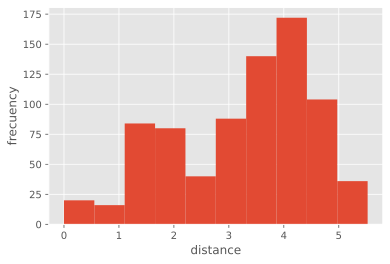

In [ ]:
plt.hist(d)
plt.xlabel(u'distance')
plt.ylabel(u'frecuency')



### f) Método de clustering. Clustering Jerárquico

Existen muchos métodos de clustering. Aquí usaremos dos métodos muy comunes: Clustering Jerárquico, y K-means. Ambos métodos requieren que se defina una medida de distancia; sin embargo, K-means también necesita que se definan previamente el número de clusters mientras que esto no es necesario en cluestring jerárquico.

Como no tenemos conocimiento previo del número de segmentos de los datos, empezaremos por el clustering jerárquico usando la distancia Euclídea como métrica de similitud entre observaciones.

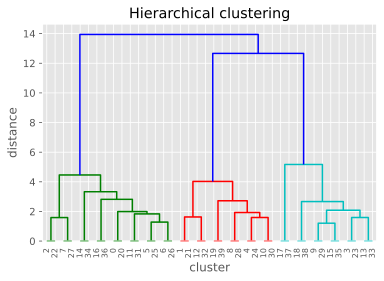

In [ ]:
from scipy.cluster.hierarchy import (dendrogram, linkage, fcluster)

Z = linkage(data_seg, 'ward')
plt.title(u'Hierarchical clustering')
plt.xlabel(u'cluster')
plt.ylabel(u'distance')
dendrogram(Z,
           leaf_rotation=90.,  # rotate the leaves of the x-axis labels
           leaf_font_size=8.   # x-axis font size
           )
plt.show()

In [ ]:
data_norm['cluster_h'] = fcluster(Z, 3, criterion='maxclust')
raw_data['cluster_h'] = fcluster(Z, 3, criterion='maxclust')

data_norm.cluster_h.value_counts()

1    16
3    12
2    12
Name: cluster_h, dtype: int64



### g) Método de clustering. K-means

Ahora vamos a probar K-means para agrupar los datos. Considerando los resultados del método anterior definimos k = 3.

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3)
data_norm['cluster_k'] = kmeans.fit_predict(data_seg)
raw_data['cluster_k'] = kmeans.fit_predict(data_seg)
data_norm.cluster_k.value_counts()

1    16
2    12
0    12
Name: cluster_k, dtype: int64



#### Validación K-means

In [ ]:
import numpy as np
from scipy.spatial.distance import cdist, pdist

# We set a range of k
k_range = range(1, 8)

# We train the K-means model for every k-value in the range
k_means_var = [KMeans(n_clusters=k).fit(data_seg) for k in k_range]



Extraemos los centroides obtenidos para cada valor de k

Text(0.5, 1.0, 'Variance explained vs. k')

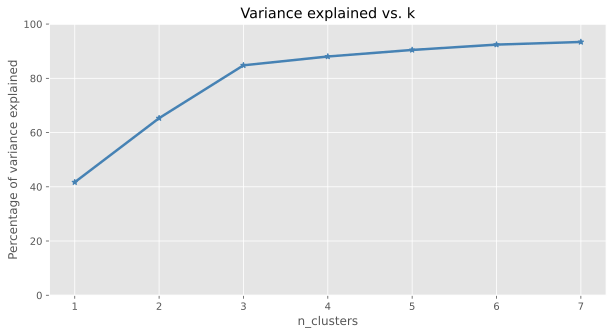

In [ ]:
centroids = [X.cluster_centers_ for X in k_means_var]

# We calculate the Euclidean distance from each point to each centroid
k_euclid = [cdist(data_seg, cent, 'euclidean') for cent in centroids]
dist = [np.min(ke, axis=1) for ke in k_euclid]

# We found the WSS
wcss = [sum(d**2) for d in dist]

# The total sum of squares
tss = sum(pdist(data_norm)**2) / len(data_norm)
7
# The sum of squares between-cluster
bss = tss - wcss

# The curve of the elbow
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
ax.plot(k_range, bss / tss * 100, 'b*-', lw=2.5, c='steelblue')
ax.set_ylim((0, 100))
plt.grid(True)
plt.xlabel('n_clusters')
plt.ylabel('Percentage of variance explained')
plt.title('Variance explained vs. k')



Se ha demostrado que los resultados obtenidos por ambos métodos son consistentes y por lo tanto estadisticamente robustos. Podemos entonces concluir que existen tres segmentos en nuestros datos.



### h) Perfil de los segmentos

Habiendo decidido por el momento cuantos clusters usar, vamos a perfilar qué tipo de clientes pertencen a cada segmento. Para ellos vamos a describir cada segmento mediante la media de cada atributo por segmento. Usando los resultados obtenidos con el método de clustering jerárquico, tenemos:

In [ ]:
hierarchical_profile = pd.DataFrame({
    'population': raw_data.apply(np.mean, axis=0),
    'segment.1': raw_data[raw_data['cluster_h'] == 1].apply(np.mean, axis=0),
    'segment.2': raw_data[raw_data['cluster_h'] == 2].apply(np.mean, axis=0),
    'segment.3': raw_data[raw_data['cluster_h'] == 3].apply(np.mean, axis=0)})

hierarchical_profile = pd.DataFrame({
    'population': data_norm.apply(np.mean, axis=0),
    'segment.1': data_norm[data_norm['cluster_h'] == 1].apply(np.mean, axis=0),
    'segment.2': data_norm[data_norm['cluster_h'] == 2].apply(np.mean, axis=0),
    'segment.3': data_norm[data_norm['cluster_h'] == 3].apply(np.mean, axis=0)})

hierarchical_profile

,population,segment.1,segment.2,segment.3
ID,4.440892e-17,-1.624305e-01,-0.043315,0.259889
V1,-3.053113e-17,1.026278e+00,-1.179319,-0.189051
V2,2.664535e-16,-3.455117e-01,-0.800132,1.260814
V3,-9.159340e-17,1.045116e+00,-1.079104,-0.314385
V4,1.828399e-16,-6.588439e-01,-0.405442,1.283901
V5,-1.110223e-16,-9.173893e-01,1.194062,0.029123
V6,2.664535e-16,-3.256558e-01,-0.697018,1.131225
Income,0.000000e+00,8.235294e-01,-0.205882,-0.892157
Mall.Visits,-5.551115e-18,-2.428613e-17,-1.171700,1.171700
cluster_h,1.900000e+00,1.000000e+00,2.000000,3.000000




También podemos obtener una representación similar usando los resultados obtenidos con k-means:

In [ ]:
profile_kmeans = pd.DataFrame({
    'population': raw_data.apply(np.mean, axis=0),
    'segment.1': raw_data[raw_data['cluster_k'] == 1].apply(np.mean, axis=0),
    'segment.2': raw_data[raw_data['cluster_k'] == 2].apply(np.mean, axis=0),
    'segment.3': raw_data[raw_data['cluster_k'] == 0].apply(np.mean, axis=0)})

profile_kmeans_norm = pd.DataFrame({
    'population': data_norm.apply(np.mean, axis=0),
    'segment.1': data_norm[data_norm['cluster_k'] == 1].apply(np.mean, axis=0),
    'segment.2': data_norm[data_norm['cluster_k'] == 2].apply(np.mean, axis=0),
    'segment.3': data_norm[data_norm['cluster_k'] == 0].apply(np.mean, axis=0)})
profile_kmeans

,population,segment.1,segment.2,segment.3
ID,20.50,20.000000,23.500000,18.625
V1,3.85,1.666667,3.500000,5.750
V2,4.10,3.000000,5.833333,3.625
V3,3.95,1.833333,3.333333,6.000
V4,4.10,3.500000,6.000000,3.125
V5,3.45,5.500000,3.500000,1.875
V6,4.35,3.333333,6.000000,3.875
Income,46000.00,42500.000000,30833.333333,60000.000
Mall.Visits,3.25,1.000000,5.500000,3.250
cluster_h,1.90,2.000000,3.000000,1.000




**¿Qué conclusiones sobre los clientes del centro comercial podemos sacar a partir de estos resultados?**



#### Comparacion del resultado con ambos metodos de clustering



Poner el numero de cluster que corresponda. En cada ejecucion se cambia el identifcador de los clusters

In [ ]:
comp = pd.DataFrame({
                    'segment.1 %': 100*(hierarchical_profile['segment.1'] == profile_kmeans['segment.1']),
                    'segment.2 %': 100*(hierarchical_profile['segment.2'] == profile_kmeans['segment.3']),
                    'segment.3 %': 100*(hierarchical_profile['segment.3'] == profile_kmeans['segment.2'])})
comp.iloc[:-2,:]

,segment.1 %,segment.2 %,segment.3 %
ID,0,0,0
V1,0,0,0
V2,0,0,0
V3,0,0,0
V4,0,0,0
V5,0,0,0
V6,0,0,0
Income,0,0,0
Mall.Visits,0,0,0
